<a href="https://colab.research.google.com/github/afperez232/IBM-Data-Science/blob/main/Espectro_Aceleracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

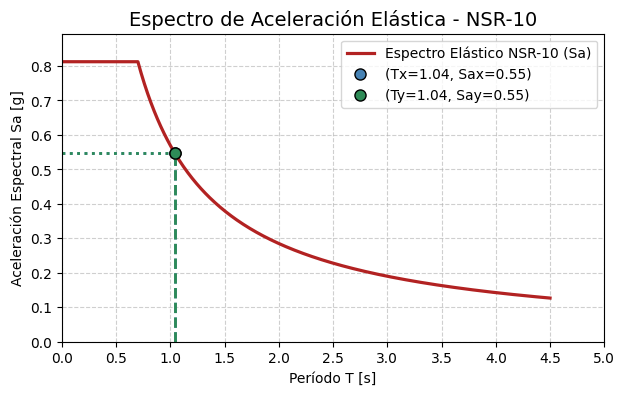

{'T0': 0.14615384615384616, 'Tc': 0.7015384615384614, 'TL': 4.56, 'Sa(Tx)': np.float64(0.547026512599231), 'Sa(Ty)': np.float64(0.547026512599231)}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def espectro_nsr10(Aa, Av, Ae, Ad, Fa, Fv, I, Tx=None, Ty=None, Sax=None, Say=None):
    """
    Calcula y grafica el espectro elástico NSR-10 (Figura A.2.4-1).
    Incluye líneas verticales para Tx y Ty, y puntos específicos para (Tx, Sax) y (Ty, Say).
    """

    # ===== 1. Períodos característicos =====
    T0 = 0.1 * (Av * Fv) / (Aa * Fa)
    Tc = 0.48 * (Av * Fv) / (Aa * Fa)
    TL = 2.4 * Fv

    # ===== 2. Rango de periodos =====
    T = np.linspace(0, 4.5, 450)
    Sa = np.zeros_like(T)

    # ===== 3. Espectro por tramos según Figura A.2.4-1 (modificado para meseta continua de 0 a Tc) =====
    for i, t in enumerate(T):
        if t <= Tc:
            Sa[i] = 2.5 * Aa * Fa * I  # Meseta continua desde T=0 hasta Tc
        elif Tc < t <= TL:
            Sa[i] = (1.2 * Av * Fv * I) / t
        else:
            Sa[i] = (1.2 * Av * Fv * TL * I) / (t ** 2)

    # ===== 4. Gráfica =====
    plt.figure(figsize=(7,4))
    plt.plot(T, Sa, color='firebrick', linewidth=2.3, label='Espectro Elástico NSR-10 (Sa)')

    # Líneas verticales Tx y Ty
    ymax = max(Sa) * 1.1
    if Tx is not None:
        if Sax is not None:
            plt.vlines(x=Tx, ymin=0, ymax=Sax, color='steelblue', linestyle='--', linewidth=2)
            plt.plot(Tx, Sax, 'o', color='steelblue', markersize=8, markeredgecolor='black', label=f'(Tx={Tx:.2f}, Sax={Sax:.2f})')
            plt.hlines(y=Sax, xmin=0, xmax=Tx, color='steelblue', linestyle=':', linewidth=2)
        else:
            plt.axvline(x=Tx, color='steelblue', linestyle='--', linewidth=2)
            plt.text(Tx, ymax*0.9, f'Tx={Tx:.2f}s', color='steelblue', ha='center', rotation=90)
    if Ty is not None:
        if Say is not None:
            plt.vlines(x=Ty, ymin=0, ymax=Say, color='seagreen', linestyle='--', linewidth=2)
            plt.plot(Ty, Say, 'o', color='seagreen', markersize=8, markeredgecolor='black', label=f'(Ty={Ty:.2f}, Say={Say:.2f})')
            plt.hlines(y=Say, xmin=0, xmax=Ty, color='seagreen', linestyle=':', linewidth=2)
        else:
            plt.axvline(x=Ty, color='seagreen', linestyle='--', linewidth=2)
            plt.text(Ty, ymax*0.9, f'Ty={Ty:.2f}s', color='seagreen', ha='center', rotation=90)

    # Líneas horizontales y verticales de referencia (se eliminan T0, Tc, TL de forma individual)
    # plt.axvline(T0, color='gray', linestyle=':')
    # plt.axvline(Tc, color='gray', linestyle=':')
    # plt.axvline(TL, color='gray', linestyle=':')

    plt.title('Espectro de Aceleración Elástica - NSR-10', fontsize=14)
    plt.xlabel('Período T [s]')
    plt.ylabel('Aceleración Espectral Sa [g]')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.xlim(0, 5)
    plt.ylim(0, ymax)
    plt.xticks(np.arange(0, 5.1, 0.5)) # Establece ticks cada 0.5 T
    plt.show()

    # ===== 5. Resultados =====
    return {
        "T0": T0,
        "Tc": Tc,
        "TL": TL,
        "Sa(Tx)": (np.interp(Tx, T, Sa) if Tx else None),
        "Sa(Ty)": (np.interp(Ty, T, Sa) if Ty else None)
    }

# ===== EJEMPLO DE USO =====
Aa = 0.25
Av = 0.25
Ae = 0.12
Ad = 0.06
Fa = 1.3
Fv = 1.9
I = 1.0
Tx = 1.042
Ty = 1.042
Sax = 0.547 # Ejemplo de valor para Sax
Say = 0.547 # Ejemplo de valor para Say

res = espectro_nsr10(Aa, Av, Ae, Ad, Fa, Fv, I, Tx, Ty, Sax, Say)
print(res)